# Assignment 0 - Landon Burleson Fall 2022

This assignment is used as an introduction to the python programming language in preparation for Machine Learning work flows. 

In [1]:
!git clone https://github.com/lrburle/ML_Assignment0.git

Cloning into 'ML_Assignment0'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 2), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

The above code snippet shows the imported modules needed for this assignment. 


In [3]:
class assign0:
        def __init__(self):
                offset = 1
                self.dict = {"a":  offset, 
                             "b" : offset,
                             "c" : offset,
                             "d" : offset,
                             "e" : offset,
                             "f" : offset,
                             "g" : offset,
                             "h" : offset,
                             "i" : offset, 
                             "j" : offset, 
                             "k" : offset,
                             "l" : offset, 
                             "m" : offset, 
                             "n" : offset, 
                             "o" : offset, 
                             "p" : offset, 
                             "q" : offset, 
                             "r" : offset, 
                             "s" : offset, 
                             "t" : offset, 
                             "u" : offset, 
                             "v" : offset, 
                             "w" : offset, 
                             "x" : offset,
                             "y" : offset, 
                             "z" : offset}
        def problem1(self):
                        with open('./ML_Assignment0/test.txt', 'r') as f: #Open the test.txt file for reading.
                                lines = f.readlines() #Read all the lines in the aforementioned file.

                                for line in lines: #Iterate through line by line through the file.
                                        for letter in line: #Iterate through each character of the string line.
                                                if letter.lower() in self.dict.keys(): #Use the .lower() method to make sure capital letters are caught and iterated within the dictionary initialized in the constructor of the class.
                                                        self.dict[letter.lower()] += 1 #Iterate on the matching lower case letter found in the dictionary.

                        arr = np.array(list(self.dict.values())) #Convert the values found in the dictionary to a numpy array
                        total = arr.sum() #Sum the elements of the array.
                        narr = arr.astype(float) / total; #Normalize the array.

                        fig = plt.figure(figsize=[25, 12]) #Plot the figure with a size of 25, 12.
                        letters = list(self.dict.keys()) #Create the x-axis values from the letters fround in the dictionary key column.
                        values = list(self.dict.values()) #Grab the values from the dictionary. 
                        plt.subplot(1, 2, 1) #Place the plots in a 1x2 grid. 
                        plt.bar(letters, values) #Plot a bar graph. 
                        plt.xlabel('Letters') #label the x-axis
                        plt.ylabel('Number of letters') #label the y-axis
                        plt.title('Number of Letter Instances vs Letters (Un-normalized)') #Create a title. 

                        plt.subplot(1, 2, 2) #Place the Normalized histigram in the second slot in the grid. 
                        plt.bar(letters, narr) #Use the letters again for the x-axis and plot the magnitude with the narr array. 
                        plt.xlabel('Letters')
                        plt.ylabel('Number of letters')
                        plt.title('Number of Letter Instances vs Letters (Normalized)')
                        plt.savefig('histogram_plots.png')


                        print(f'The dictionary is found here:{self.dict}')
                        print(f'Numpy array of un-normalized values: {arr}')
                        print(f'Numpy array of normalized values: {narr}')

        def problem2(self):
                        points = np.array([[255, 0,  0], [0, 255, 0], [0,0,255]]) #Create an array of the three points. 
                        I = cv.imread('./ML_Assignment0/test.png') #Read in the image test.png.
                        row, col, _ = I.shape #Grab the row and column size metrics from the image. Ommit the color channel. 
                        O = np.zeros((row, col, 3), dtype=int) #Create an empty 3D array with initialized values of 0. 

                        for i in range(row): #Iterate through each row of the image using the i variable. 
                                for j in range(col): #Iterate through each column of the image using the j variable. 
                                        current_point = np.array(I[i, j, :]) #Grabs the current RGB point value for comparison using the Euclidian distance. 
                                        p = self.euclidian(current_point, points) #Uses the defined Euclidian distance function below for the closeness analysis. 
                                        O[i,j] = p #Sets the point in the empty array to the appropriate RGB point value based on the Euclidian calculation. 
                        print('Output from the color segmentation of test.png')
                        cv2_imshow(O)
                        cv.imwrite('./output1.png', O) #Writes the output image. 

                        O2 = I #Initializes O2 as equal to the original test.png image. 
                        rowLower = int((row / 2) - 25) #Finds the four corners of the 50 pixel square to cut out the black box in the image.  
                        rowUpper = int((row / 2) + 25)
                        colLower = int((col / 2) - 25)
                        colUpper = int((col / 2) + 25)

                        O2[rowLower:rowUpper,colLower:colUpper, :] = [0, 0, 0] #Sets the appropriate pixels to the black (0, 0, 0) RGB value. 
                        cv2_imshow(O2)
                        print('Output from the second part of problem 2. Setting the middle of the image as a black box.')
                        cv.imwrite('./output2.png', O2) #Writes the to the output2.png image. 

        def euclidian(self, p, p2): #Euclidian distance used to calculate the relationship found above in problem2.
                d = []

                for itr, arr in enumerate(p2):
                        sub = (arr - p)**2
                        d.append(np.sqrt(sub.sum())) 

                        if itr == 0:
                                current_lowest = d[0] 
                                point_value = arr
                        if d[itr] < current_lowest: #Finds the current lowest distance and sets the point_value that point. 
                                current_lowest = d[0] 
                                point_value = arr
                        else:
                                continue
                
                return point_value 
                
        def problem3(self): 
                        a = np.array([[3, 3], [4, 2]]) #Sets the values of the system of equations for the word problem. I get 3 soft tacos and 3 burroitos. My friend gets 4 soft tacos and 2 burritos.
                        b = np.array([[11.25], [10.00]]) # Sets the total for my bill and my friends bill. 

                        det = np.linalg.det(a) #Makes sure the matrix is a valid square matrix. 

                        x = np.linalg.solve(a, b) #Solves the linear equations using the linalg.solve function. Ax = B 

                        print(f'The soft tacos are ${float(x[0]):.2f} and the burritos are ${float(x[1]):.2f}') #Outputs the value of the Tacos and Burritos by rounding to two decimal places. 

The code found below assigns the a0 variable to the object assign0 defined by the assign0 class found above. The object a0 is then used to call the various problem code found above. 

In [4]:
if __name__ == '__main__':
        a0 = assign0()

# Problem 1 

Found below is the problem 1 call. The code for problem 1 is defined inside of the class assign0 found above. 

In [5]:
a0.problem1()

FileNotFoundError: ignored

# Problem 2

Found below is the problem 2 execution code. The source code can be found in the problem2 method found in the assign0 class. 

Output from the color segmentation of test.png


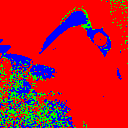

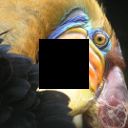

Output from the second part of problem 2. Setting the middle of the image as a black box.


In [ ]:
a0.problem2()

# Problem 3 

In [ ]:
a0.problem3()

The soft tacos are $1.25 and the burritos are $2.50
